## DATA 604 Discussion Board - Week 1
**Magnus Skonberg | June 2nd 2021**

The purpose of this week's discussion board was to:

"Write a simulation for a simple game of chance (e.g., drawing cards, rolling one or more dice, etc.). Run the simulation 1000 times and interpret the outcome. Post your code here, and discuss what might be done to improve it."

I elected to simulate "Rock, Paper, Scissor, Shoot!":

In [33]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import collections
import random
from modsim import *

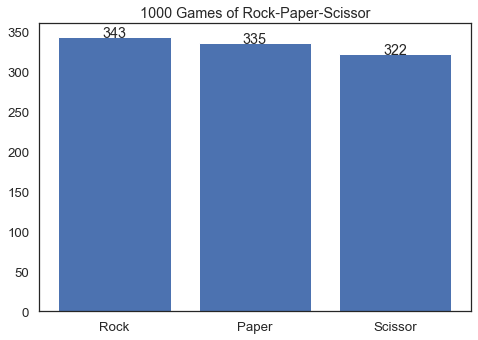

In [36]:
random.seed(123) #ensure reproducibility
n = 1000 #run simulation 1000 times

#Compose our list of random integers, chosen at random (ie. probability 0.333)
user = [random.randint(1,3) for i in range(n)]
user_count = collections.Counter(user)

#Plot number of Rock vs. Paper vs. Scissor played
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
hand = ['Rock', 'Paper', 'Scissor']
count = [user_count[1], user_count[2], user_count[3]]
ax.bar(hand, count)


# zip joins x and y coordinates in pairs
for x,y in zip(hand,count):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title("1000 Games of Rock-Paper-Scissor")
plt.show()


As a next step we can add in an additional simulated player "comp" and see how our simulated "user" hand fared based on the hand played (ie. rock):

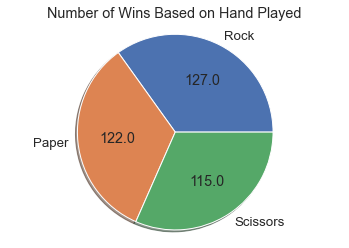

In [38]:
random.seed(122) #ensure reproducibility
rock_wins = 0
paper_wins = 0
scissor_wins = 0

comp = [random.randint(1,3) for j in range(n)]
comp_count = collections.Counter(comp)

for i in range(n):
    
    ##Rock (1) > Scissor (3)
    if user[i] == 1 and comp[i] == 3:
        rock_wins += 1
    
    ##Paper (2) > Rock (1)
    if user[i] == 2 and comp[i] == 1:
        paper_wins += 1
    
    ##Scissor (3) > Paper (2)
    if user[i] == 3 and comp[i] == 2:
        scissor_wins += 1

#print(rock_wins) #127
#print(paper_wins) #122
#print(scissor_wins) #115

wins = np.array([rock_wins, paper_wins, scissor_wins])
labels = ["Rock", "Paper", "Scissors"]

#plt.pie(wins, labels = labels)
#plt.show() 

def absolute_value(val):
    a  = np.round(val/100*wins.sum(), 0)
    return a

plt.pie(wins, labels=labels,
        autopct=absolute_value, shadow=True)

plt.title("Number of Wins Based on Hand Played")
plt.axis('equal')
plt.show()